In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import zscore
from sklearn import metrics

In [2]:
train=pd.read_csv('C:\\Users\\Ashok\\Desktop\\unsupervised\\Train_UWu5bXk.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
#we cannot remove the item id, there is a pattern to it

In [6]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
train['Item_Type'].nunique() #16 items

16

In [8]:
#pull the item type and sales
newtrain=train[['Item_Type','Item_Outlet_Sales']]

In [9]:
newtrain.head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [10]:
#convert item type through label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
newtrain['Item_Type']=le.fit_transform(newtrain.Item_Type)

C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
newtrain.head()

,Item_Type,Item_Outlet_Sales
0,4,3735.1380
1,14,443.4228
2,10,2097.2700
3,6,732.3800
4,9,994.7052


In [14]:
#elbow plot and find wcss #now without scaling

In [15]:
from sklearn.cluster import KMeans

In [16]:
clusters=range(1,16)#coz total items =16

wcss=[]

for i in clusters:
    k=KMeans(n_clusters=i)
    model=k.fit(newtrain)
    wcss.append(k.inertia_)

In [17]:
wcss

[24817416121.94741,
 8285987202.655233,
 4056912551.168075,
 2484147417.270803,
 1633311190.2882738,
 1178069421.4656808,
 879471481.3300977,
 688696092.8517936,
 549803263.0930845,
 441791678.9952319,
 367865430.3413161,
 312500535.3167658,
 266967336.64532676,
 233166502.48405385,
 206240003.1548021]

In [18]:
wcss/sum(wcss) #%diff

array([0.53483106, 0.17856828, 0.08742904, 0.05353495, 0.03519889,
       0.02538814, 0.01895317, 0.01484184, 0.01184861, 0.00952089,
       0.00792773, 0.00673458, 0.00575332, 0.00502489, 0.0044446 ])

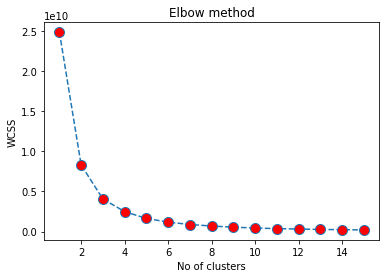

In [19]:
plt.plot(clusters,wcss,"-o",markerfacecolor="r",linestyle="dashed",markersize=10)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

In [20]:
#5 clusters

In [21]:
import scipy.cluster.hierarchy as sch

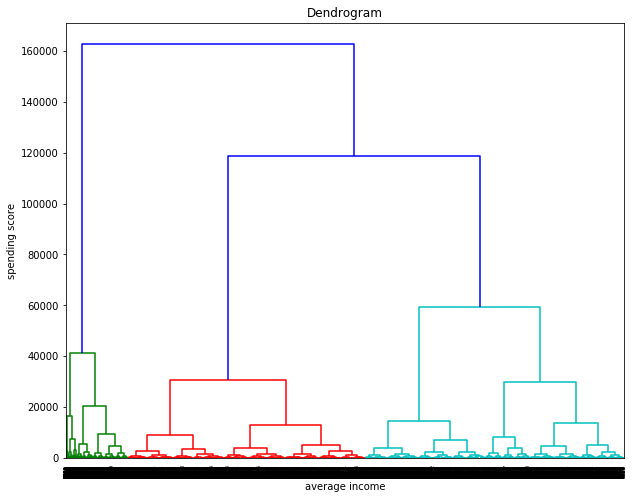

In [22]:
plt.figure(figsize=[10,8])
dendrogram=sch.dendrogram(sch.linkage(newtrain, method="ward")) 
plt.xlabel("average income")
plt.ylabel("spending score")
plt.title("Dendrogram")
plt.show()

In [23]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
vrynewtrain=train[['Item_Fat_Content','Item_Outlet_Sales']]

In [25]:
vrynewtrain['Item_Fat_Content']=le.fit_transform(vrynewtrain.Item_Fat_Content)

C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
vrynewtrain.Item_Fat_Content.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [32]:
clusters1=range(1,10)#coz total items =16

wcss1=[]

for i in clusters1:
    k=KMeans(n_clusters=i)
    model=k.fit(vrynewtrain)
    wcss1.append(k.inertia_)

In [33]:
wcss1

[24817268621.169746,
 8285848598.010811,
 4056764598.0995045,
 2484049767.7218328,
 1633572735.4704795,
 1177995865.0555353,
 879343505.5696084,
 688559714.7610472,
 549718561.7728978]

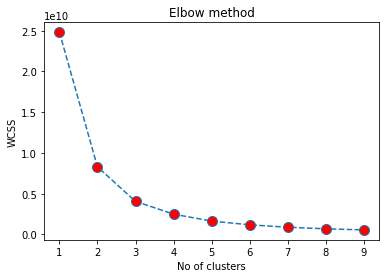

In [34]:
plt.plot(clusters1,wcss1,"-o",markerfacecolor="r",linestyle="dashed",markersize=10)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

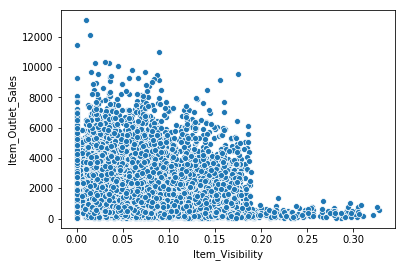

In [37]:
sns.scatterplot(train.Item_Visibility,train.Item_Outlet_Sales) #shows negative relation

In [39]:
#sales is decreasing when visibility is increasing, which is not correct

In [40]:
#why the sale is decreasing?

In [41]:
# sale of biscuit is more (visibility is vry less/vry small compared to washing machine), 
#compared to sale of washing machine which is huge compared to visibility.
#hence we see this pattern.
#evry day we buy biscuits but not washing machine